#### Library Importations
- These are the Data analysis and vizualization tools being used for the assignment.

In [2]:
import datetime
import time
import numpy as np
import pandas as pd
import matplotlib as plt

#### Import Data file
- Importing and storing the data from the `.csv` file being used for the assignment.

In [61]:
data = pd.read_csv('files/company_A_call_records.csv', parse_dates=['call_end_date'])

# Coverting call_end_date time
# data.call_end_date = data.call_end_date.dt.time

# Covert call_duration to int
data.call_duration = round(data.call_duration).astype(int)

#### Getting the summary of our data set

In [53]:
data.head()

,call_id,destination_person_id,source_person_id,account_age,account_state,occupation,language,call_direction,call_duration,call_outcome,call_end_date,call_topics,call_topic_group
0,2807990,86394,269898,301,In Repayment,Farmer,Luganda,Incoming,1,Call Resolved,04:01:00,Call Dropped,Other
1,2807991,86394,320367,122,In Repayment,Other,Luganda,Incoming,2,Call Resolved,04:04:00,Code Not Received,Codes
2,2807992,212967,129042,695,In Repayment,Mechanic / Technician,Luganda,Incoming,5,Call Resolved,04:05:00,RP Remote Technical,Accessory Technical Issue
3,2807993,114159,372282,22,In Repayment,Farmer,Lango,Incoming,4,Call Resolved,04:06:00,Code Not Received,Codes
4,2807994,86394,366749,44,In Repayment,Electrician,Luganda,Incoming,3,Call Resolved,04:07:00,Code Not Received,Codes


In [43]:
# The number of rows and columns in the data set
data.shape

(32028, 14)

In [6]:
# Additional useful information about the columns in the data set.(column name, data type)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32028 entries, 0 to 32027
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   call_id                32028 non-null  int64 
 1   destination_person_id  32028 non-null  int64 
 2   source_person_id       32028 non-null  int64 
 3   account_age            32028 non-null  int64 
 4   account_state          32028 non-null  object
 5   occupation             31933 non-null  object
 6   language               32027 non-null  object
 7   call_direction         32028 non-null  object
 8   call_duration          32028 non-null  int32 
 9   call_outcome           32028 non-null  object
 10  call_end_date          32028 non-null  object
 11  call_topics            32028 non-null  object
 12  call_topic_group       32028 non-null  object
 13  call_start_date        32028 non-null  object
dtypes: int32(1), int64(4), object(9)
memory usage: 3.3+ MB


#### Question 1
**1.1**. How many customers called Company_A multiple times in the 2 week period?

In [65]:
# Step 1: Extract all incoming calls from the overall data set since we are looking for Customers who called in
callers = data[data.call_direction == 'Incoming'].source_person_id.value_counts()

# Step 2: Filter out callers who called in more than once (multiple times == 2 or more times)
frequent_callers = data.loc[callers[callers >= 2]]

# Step 3: Get number of customers who called in multiple times
print('The number of customers who called in multiple times is: {num_callers}'.format(num_callers = frequent_callers.shape[0]))

The number of customers who called in multiple times is: 5346


**1.2**. What were we discussing with the customers who contacted us multiple times?

In [57]:
# Get the count of call_topics to see which tags were used by CSRs
frequent_callers.call_topics.value_counts()

RP Remote Technical                     2988
Code Not Received                       1830
Code Entered Late, Code Not Received     249
General Question                         133
Call transfer                            106
Ended Call- Hearing/Speaking Issues       16
Payment inquiry                           10
ReadyRefer 3 Days Inquiry                  7
Account Association                        2
Does Not Charge From Mains                 2
Customer NOT with PS                       2
Code Entry Support                         1
Name: call_topics, dtype: int64

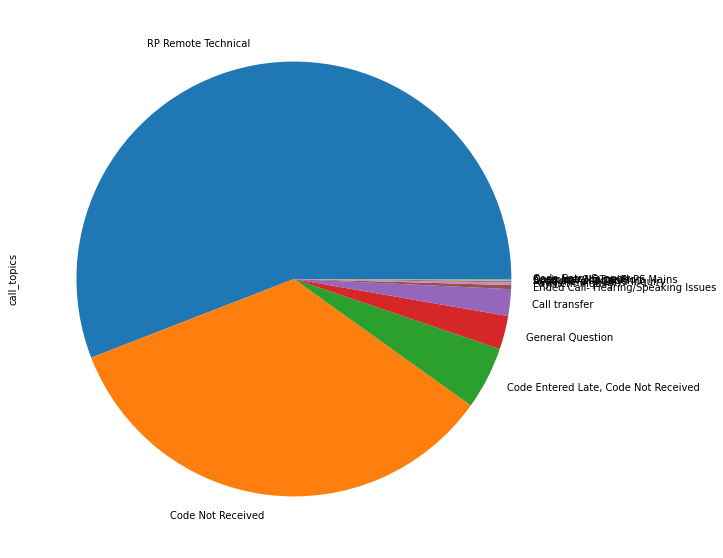

In [58]:
# A Pie chart to show call topics discussed
frequent_callers.call_topics.value_counts().plot(kind='pie', figsize=(10, 10))

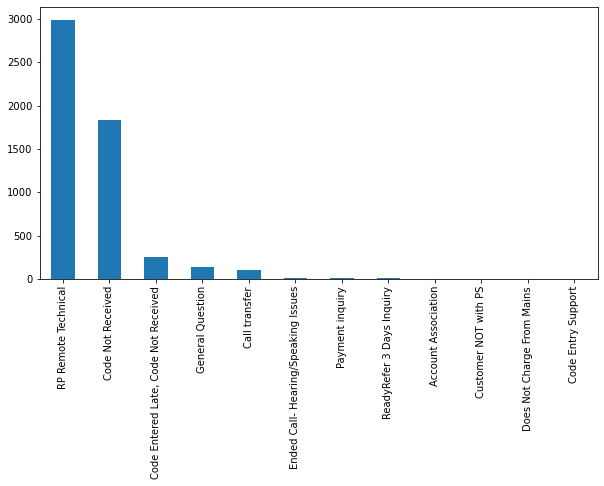

In [15]:
# A Bar graph showing call topics discussed
frequent_callers.call_topics.value_counts().plot(kind='bar', figsize=(10, 5))

As shown in both the pie chart and bar graph, the most frequently asked topics discussed based on the data set are **RP Remote Technical** issues and **Code Not Received**.

#### Question 2
Should we be looking at a customer's occupation when we decide when to call
them?

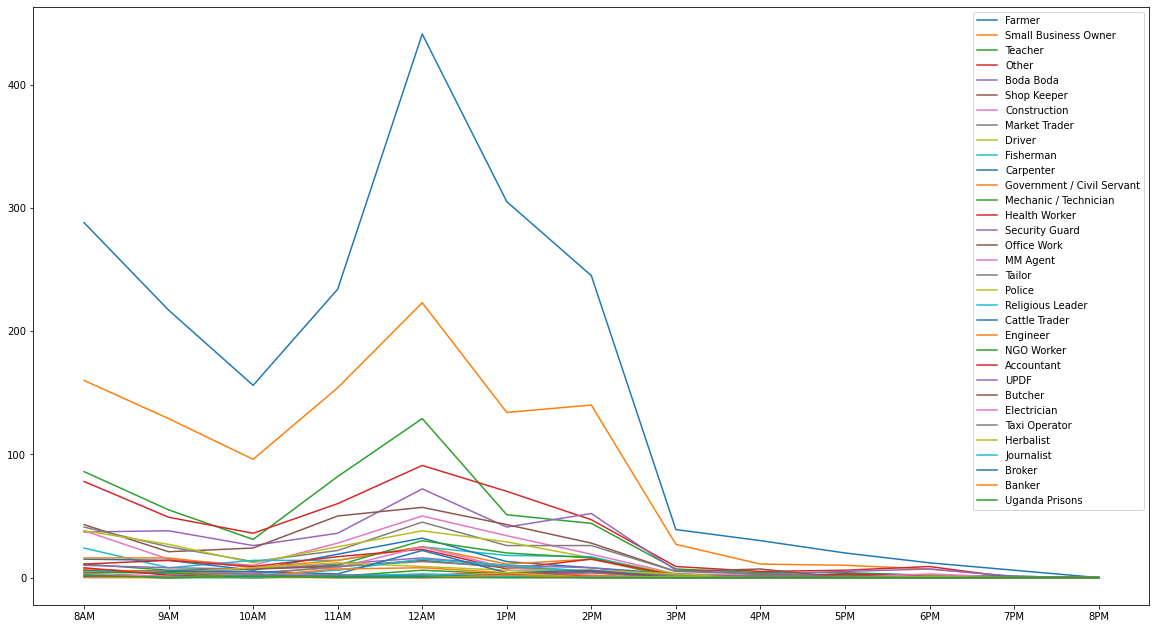

In [88]:
# Get information on Outgoing calls
outgoing_calls = data.loc[data.call_direction == 'Outgoing']

# Get customer occupation stats
# early_morning_shift = outgoing_calls[outgoing_calls.call_end_date.dt.strftime('%H:%M:%S').between('04:00:00','08:00:00')]

# All occupations
customer_occupations = ['Farmer', 'Small Business Owner', 'Teacher', 'Other', 'Boda Boda', 'Shop Keeper', 'Construction', 'Market Trader', 'Driver', 'Fisherman', 'Carpenter', 'Government / Civil Servant', 'Mechanic / Technician', 'Health Worker', 'Security Guard', 'Office Work', 'MM Agent', 'Tailor', 'Police', 'Religious Leader', 'Cattle Trader', 'Engineer', 'NGO Worker', 'Accountant', 'UPDF', 'Butcher', 'Electrician', 'Taxi Operator', 'Herbalist', 'Journalist', 'Broker', 'Banker', 'Uganda Prisons']

# Working hours as per document
work_hours = ['8AM', '9AM', "10AM", '11AM', '12AM', '1PM', '2PM', '3PM', '4PM', '5PM', '6PM', '7PM', '8PM']


def get_hour_calls(data, hour_start, hour_end):
    '''
        This method helps to filter data set by timestamps provided as arguments to the method
    '''
    return data.loc[data.call_end_date.dt.strftime('%H:%M:%S').between(hour_start, hour_end)].shape[0]

def get_occupations_data(occupations):
    '''
        This method helps to get the number of calls made to customers in a specific occupation category.
    '''
    occupations_data = []
    for occupation in occupations:
        occupation_dict = {}
        occupation_dict['label'] = occupation
        occupation_data = outgoing_calls.loc[outgoing_calls.occupation == occupation]
        num_calls = [
            get_hour_calls(occupation_data, '08:00:00', '09:00:00'),
            get_hour_calls(occupation_data, '09:00:00', '10:00:00'),
            get_hour_calls(occupation_data, '10:00:00', '11:00:00'),
            get_hour_calls(occupation_data, '11:00:00', '12:00:00'),
            get_hour_calls(occupation_data, '12:00:00', '13:00:00'),
            get_hour_calls(occupation_data, '13:00:00', '14:00:00'),
            get_hour_calls(occupation_data, '14:00:00', '15:00:00'),
            get_hour_calls(occupation_data, '15:00:00', '16:00:00'),
            get_hour_calls(occupation_data, '16:00:00', '17:00:00'),
            get_hour_calls(occupation_data, '17:00:00', '18:00:00'),
            get_hour_calls(occupation_data, '18:00:00', '19:00:00'),
            get_hour_calls(occupation_data, '19:00:00', '20:00:00'),
            get_hour_calls(occupation_data, '20:00:00', '21:00:00')
                    ]
        occupation_dict['data'] = num_calls
        occupations_data.append(occupation_dict)
    return occupations_data

def line_graph_data_plot(occupations_data, hours):
    '''
        This method helps to plot the number of calls made to each occupation against the time of the day.
    '''
    fig = plt.pyplot.gcf()
    fig.set_size_inches(20, 11)
    labels = []
    count = 0
    for occupation in occupations_data:
        plt.pyplot.plot(hours, occupation['data'], label=occupation['label'])
        labels.append(occupation['label'])
    plt.pyplot.legend(labels)
    plt.pyplot.show()

line_graph_data_plot(get_occupations_data(customer_occupations), work_hours)

As shown in the line graph above that maps number of calls per occupation against time, it is evident that we need to look at a customer's occupation before we call them, the availability of some customers is dictated upon by their type of work.

#### Question 3
From region of the country do we have the greatest number of customers?

In [86]:
# Step 1: Extract all incoming calls from the overall data set since we are looking for Customers who called in
callers = data[data.call_direction == 'Incoming']

# Step 2: Get number of callers per region using the 'language' column
callers_per_region = callers.language.value_counts()
callers_per_region

Luganda           7320
Lunyankore        3054
English           2422
Lusoga            1798
Lumasaba          1331
Ateso             1243
Lutooro            899
Lango              830
Lunyoro            770
Alur               558
Lugbara            539
Rukiga             525
Lukonjo            522
Rufumbira          399
Samia              393
Lugwere            374
Acholi             352
Japadhola          348
Kupsabiiny         215
Kinyarwanda        156
Lunyole             64
Kumam               49
Swahili             39
Ma'di               33
Karamojong          17
Lungungu            14
Kakwa               12
Ng'akarimojong       8
Lubwiisi             2
Name: language, dtype: int64

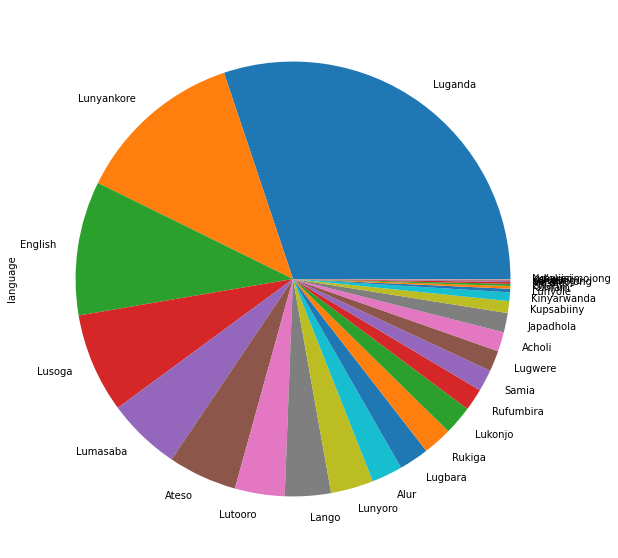

In [91]:
# Plot a Pie chart of callers per region
callers_per_region.plot(kind='pie', figsize=(10, 10))

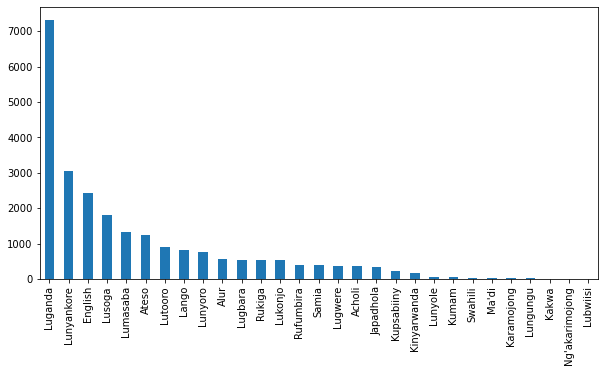

In [81]:
# Plot a Bar graph of callers per region
callers_per_region.plot(kind='bar', figsize=(10, 5))

As per evidence of the data set extracted, the most callers are from the central region since Luganda has the highest number of callers.

#### Question 4
Which language speaking customer care personnel should we employ most?

In [93]:
# Step 1: Extract all outgoing calls from the overall data set since we are looking for CSRs per language that we ought to employ most.
personnel = data[data.call_direction == 'Outgoing']

# Step 2: Get number of calls made by CSRs per region using the 'language' column
personnel_per_region = personnel.language.value_counts()
personnel_per_region

Luganda        2197
English        1255
Lunyankore      654
Ateso           551
Lango           383
Lugbara         375
Alur            332
Lusoga          320
Lutooro         279
Lunyoro         201
Lumasaba        194
Lukonjo         177
Rukiga          143
Japadhola       131
Kupsabiiny      131
Samia            99
Acholi           97
Rufumbira        97
Lugwere          56
Lunyole          18
Swahili          14
Kinyarwanda      14
Ma'di            10
Kakwa             9
Kumam             4
Name: language, dtype: int64

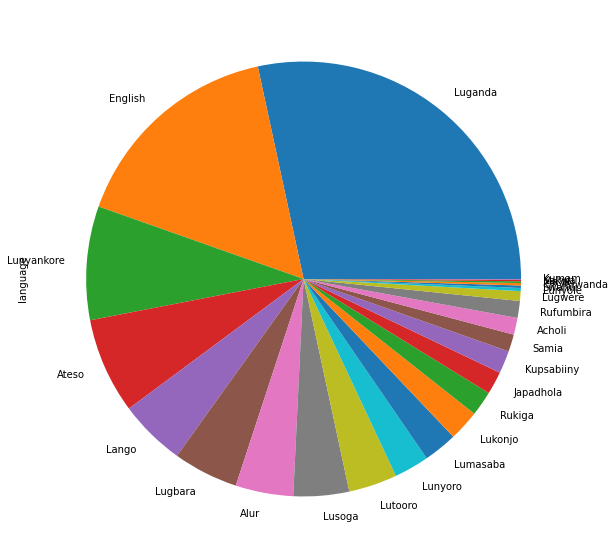

In [104]:
# Step 3: Plot a Pie chart of calls per region
personnel_per_region.plot(kind='pie', figsize=(10, 10))

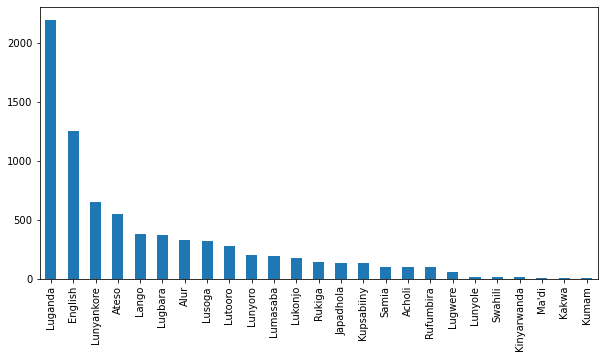

In [96]:
# Step 4: Plot a Bar graph of calls per region
personnel_per_region.plot(kind='bar', figsize=(10, 5))

As per evidence of the data set extracted, the language customer care personnel to be employed the most ought to be a Luganda speaking individual, since they make the highest number of outgoing calls.

#### Question 5
Their are currently 3 available shifts i.e morning(8pm-12pm), afternoon(12pm-4pm) and evening(4pm-8pm) mentioned in the description of Company_A's work schedule, however, the data presented contains timestamps of an earlier time before the morning shift. Call this new shift day_break and show the number of customers who call in at this time per region.

In [97]:
# Step 1: Get information on Incoming calls
incoming_calls = data.loc[data.call_direction == 'Incoming']

# Step 2: Get customer calls between 4AM and 8AM per region
day_break = incoming_calls[incoming_calls.call_end_date.dt.strftime('%H:%M:%S').between('04:00:00','08:00:00')].language.value_counts()
day_break

Luganda           1430
Lunyankore         472
English            377
Lusoga             254
Ateso              173
Lumasaba           173
Lango              165
Lutooro            133
Lunyoro            123
Lugbara             95
Rukiga              95
Alur                88
Lukonjo             69
Acholi              62
Lugwere             58
Rufumbira           48
Japadhola           41
Kupsabiiny          41
Samia               40
Kinyarwanda         26
Swahili              7
Lunyole              5
Kumam                5
Ma'di                4
Karamojong           3
Lungungu             2
Kakwa                1
Lubwiisi             1
Ng'akarimojong       1
Name: language, dtype: int64

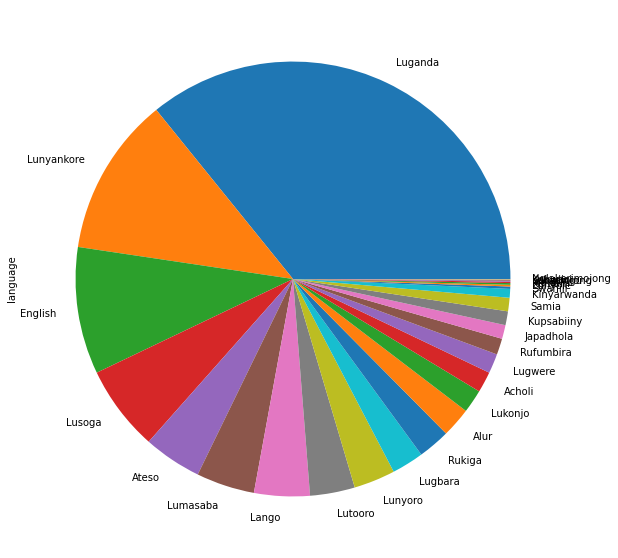

In [98]:
# Step 4: Plot a Pie chart of customer calls between 4AM and 8AM per region
day_break.plot(kind='pie', figsize=(10, 10))

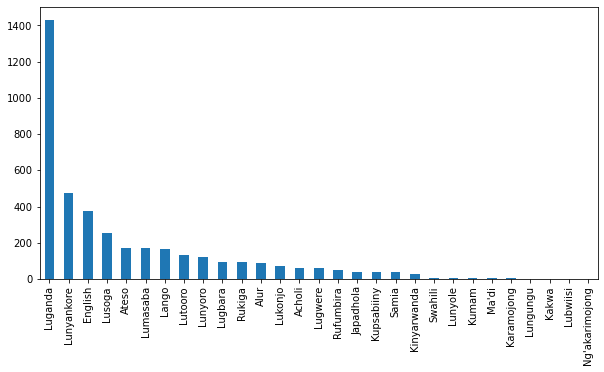

In [102]:
# Step 5: Plot a Bar graph of customer calls between 4AM and 8AM per region
day_break.plot(kind='bar', figsize=(10, 5))

#### Question 6

How is this analysis impactful to Company_A's call center operations?

- According to the analysis done, it's evident there is a significant number of callers who call in very early in the morning and mainly from the center region (Buganda). Thus more customer care personnel need to be brought to a shift that starts from 4AM to 8AM.
- There is a need to employ more personnel for the Western region and these personnel should be added to the shift that starts from 4AM to 8AM.